<a href="https://colab.research.google.com/github/wAreRza/labs/blob/main/3%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [4]:
# Загрузка набора данных
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


In [6]:
# Количество уникальных значений
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

AGE_50: 45 уникальных значений
MD_50: 4 уникальных значений
SBP_50: 38 уникальных значений
DBP_50: 31 уникальных значений
HT_50: 15 уникальных значений
WT_50: 92 уникальных значений
CHOL_50: 94 уникальных значений
SES: 5 уникальных значений
CL_STATUS: 7 уникальных значений
MD_62: 5 уникальных значений
SBP_62: 55 уникальных значений
DBP_62: 32 уникальных значений
CHOL_62: 123 уникальных значений
WT_62: 92 уникальных значений
IHD_DX: 10 уникальных значений
DEATH: 2 уникальных значений


In [7]:
df.DEATH = df.DEATH.astype('category')

In [8]:
Y = df['DEATH'] # выбираем целевую переменную (категориальную)
X = df.drop('DEATH', axis=1) # переменные для проверки влияния

In [9]:
df.drop('DEATH', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
dtypes: int64(15)
memory usage: 23.6 KB


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
dtypes: int64(15)
memory usage: 23.6 KB


In [11]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [12]:
X_processed

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0


In [13]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
X_processed

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
0,0.448980,0.000000,0.180328,0.264706,0.214286,0.279412,0.412048,0.25,1.00,0.75,0.31250,0.318841,0.576419,0.275362,0.222222
1,0.673469,0.000000,0.344262,0.333333,0.571429,0.426471,0.380723,0.00,0.75,0.25,0.32500,0.173913,0.484716,0.413043,1.000000
2,0.673469,0.333333,0.262295,0.509804,0.642857,0.830882,0.534940,0.75,1.00,0.00,0.38750,0.492754,0.720524,0.833333,0.222222
3,0.571429,1.000000,0.262295,0.411765,0.785714,0.882353,0.286747,0.75,1.00,0.25,0.30000,0.173913,0.305677,0.862319,0.333333
4,0.673469,0.666667,0.245902,0.352941,0.357143,0.183824,0.296386,0.50,1.00,1.00,0.30000,0.000000,0.532751,0.217391,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.000000,0.221311,0.411765,0.357143,0.286765,0.433735,0.25,1.00,0.00,0.28125,0.130435,0.585153,0.318841,0.000000
196,0.061224,0.000000,0.180328,0.313725,0.571429,0.205882,0.000000,0.50,1.00,0.25,0.26250,0.289855,0.257642,0.326087,0.000000
197,0.000000,0.666667,0.344262,0.411765,0.357143,0.301471,0.216867,1.00,0.00,0.00,0.37500,0.420290,0.589520,0.362319,0.000000
198,0.530612,0.666667,0.426230,0.450980,0.357143,0.213235,0.024096,0.75,0.75,0.25,0.48750,0.463768,0.091703,0.355072,0.000000


In [14]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [15]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.7500
Точность на тестовой выборке: 0.7250

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.75      0.23      0.35        13

    accuracy                           0.72        40
   macro avg       0.74      0.60      0.59        40
weighted avg       0.73      0.72      0.67        40



LogisticRegression(max_iter=1000)

In [16]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['float64', 'int64'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [17]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3.0)

In [18]:
X_processed.describe()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.531939,0.453333,0.300820,0.444902,0.511429,0.434375,0.332783,0.478750,0.956250,0.328750,0.446750,0.417681,0.502489,0.430254,0.156667
std,0.220668,0.339211,0.148481,0.107848,0.197726,0.195879,0.133793,0.267336,0.139965,0.299264,0.154105,0.185625,0.203099,0.199393,0.273800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367347,0.000000,0.180328,0.392157,0.357143,0.279412,0.240964,0.250000,1.000000,0.000000,0.343750,0.289855,0.365721,0.295290,0.000000
50%,0.551020,0.333333,0.262295,0.411765,0.500000,0.411765,0.313253,0.500000,1.000000,0.250000,0.425000,0.391304,0.491266,0.416667,0.000000
75%,0.693878,0.666667,0.344262,0.509804,0.642857,0.588235,0.421687,0.500000,1.000000,0.500000,0.531250,0.492754,0.629913,0.572464,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
X_iqr.describe()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.523021,0.453252,0.263944,0.423721,0.522648,0.424229,0.321848,0.480183,1.0,0.341463,0.425953,0.400407,0.506071,0.428729,0.116531
std,0.220559,0.342188,0.104848,0.077813,0.195376,0.193813,0.120752,0.250742,0.0,0.297000,0.142735,0.172545,0.198241,0.202813,0.212751
min,0.040816,0.000000,0.000000,0.166667,0.071429,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.048035,0.000000,0.000000
25%,0.362245,0.000000,0.180328,0.392157,0.357143,0.277574,0.240964,0.250000,1.0,0.000000,0.334375,0.275362,0.370087,0.282609,0.000000
50%,0.540816,0.333333,0.262295,0.411765,0.571429,0.397059,0.313253,0.500000,1.0,0.250000,0.403125,0.347826,0.491266,0.416667,0.000000
75%,0.678571,0.666667,0.344262,0.509804,0.642857,0.582721,0.409639,0.500000,1.0,0.500000,0.500000,0.492754,0.634279,0.572464,0.222222
max,1.000000,1.000000,0.590164,0.607843,1.000000,0.926471,0.768675,1.000000,1.0,1.000000,1.000000,0.927536,0.995633,1.000000,0.777778


In [20]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.7405
Точность на тестовой выборке: 0.6970

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        22
           1       0.60      0.27      0.38        11

    accuracy                           0.70        33
   macro avg       0.66      0.59      0.59        33
weighted avg       0.68      0.70      0.66        33



LogisticRegression(max_iter=1000)

Количество наблюдений уменьшилось на 18% (36 наблюдений), при этом точность немного снизилась (на  0.01). Попробуем улучшить нашу модель.

In [21]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [22]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [23]:
X_processed.describe()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.531939,0.453333,0.300820,0.444902,0.511429,0.434375,0.332783,0.478750,0.956250,0.328750,0.446750,0.417681,0.502489,0.430254,0.156667
std,0.220668,0.339211,0.148481,0.107848,0.197726,0.195879,0.133793,0.267336,0.139965,0.299264,0.154105,0.185625,0.203099,0.199393,0.273800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367347,0.000000,0.180328,0.392157,0.357143,0.279412,0.240964,0.250000,1.000000,0.000000,0.343750,0.289855,0.365721,0.295290,0.000000
50%,0.551020,0.333333,0.262295,0.411765,0.500000,0.411765,0.313253,0.500000,1.000000,0.250000,0.425000,0.391304,0.491266,0.416667,0.000000
75%,0.693878,0.666667,0.344262,0.509804,0.642857,0.588235,0.421687,0.500000,1.000000,0.500000,0.531250,0.492754,0.629913,0.572464,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
X_mean.describe()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.529827,0.471795,0.272699,0.426018,0.507692,0.396663,0.319944,0.490385,0.991346,0.321154,0.427548,0.397882,0.494390,0.390134,0.111111
std,0.202850,0.334068,0.113011,0.081507,0.177488,0.164502,0.105602,0.229602,0.038719,0.280563,0.126605,0.169706,0.172776,0.169736,0.208903
min,0.102041,0.000000,0.098361,0.254902,0.142857,0.088235,0.072289,0.000000,0.750000,0.000000,0.187500,0.057971,0.131004,0.036232,0.000000
25%,0.392857,0.333333,0.180328,0.392157,0.357143,0.264706,0.240964,0.312500,1.000000,0.000000,0.339063,0.275362,0.372271,0.275362,0.000000
50%,0.530612,0.333333,0.262295,0.411765,0.571429,0.378676,0.313253,0.500000,1.000000,0.250000,0.406250,0.347826,0.489083,0.384058,0.000000
75%,0.673469,0.666667,0.344262,0.509804,0.642857,0.518382,0.404819,0.500000,1.000000,0.500000,0.500000,0.492754,0.604803,0.512681,0.222222
max,0.918367,1.000000,0.590164,0.656863,0.857143,0.779412,0.585542,1.000000,1.000000,0.750000,0.750000,0.782609,0.868996,0.760870,0.666667


In [25]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.7308
Точность на тестовой выборке: 0.6923

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.50      0.12      0.20         8

    accuracy                           0.69        26
   macro avg       0.60      0.53      0.50        26
weighted avg       0.64      0.69      0.62        26



LogisticRegression(max_iter=1000)

Количество наблюдений снизилось уже на 35% (70 наблюдений), точность снизилась на примерно 0.02 относительно начальной выборки. Можно сделать вывод, что начальная выборка достаточно сбалансирована и не нуждается в очистке от выбросов.

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
# Filter - метод
selector = SelectKBest(score_func=chi2, k = 5)
X_kbest = selector.fit_transform(X_processed, Y)

chi2:
В df все значения - целые числа, значит, это количество каких-либо событий или степень заболевания (кроме веса, роста и возраста). Так что он подойдет лучше всего.

In [28]:
selector.scores_

array([2.87627086e+00, 2.05458838e-01, 1.97552816e-01, 1.98280774e-04,
       2.89602748e-02, 7.21222839e-02, 1.00998965e-02, 1.29089234e-01,
       7.26883891e-03, 8.36753523e-01, 1.98029606e-02, 1.07557980e-01,
       2.98908074e-01, 5.20934289e-01, 8.95610254e-01])

In [29]:
X_processed.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX'],
      dtype='object')

In [30]:
X_processed

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
0,0.448980,0.000000,0.180328,0.264706,0.214286,0.279412,0.412048,0.25,1.00,0.75,0.31250,0.318841,0.576419,0.275362,0.222222
1,0.673469,0.000000,0.344262,0.333333,0.571429,0.426471,0.380723,0.00,0.75,0.25,0.32500,0.173913,0.484716,0.413043,1.000000
2,0.673469,0.333333,0.262295,0.509804,0.642857,0.830882,0.534940,0.75,1.00,0.00,0.38750,0.492754,0.720524,0.833333,0.222222
3,0.571429,1.000000,0.262295,0.411765,0.785714,0.882353,0.286747,0.75,1.00,0.25,0.30000,0.173913,0.305677,0.862319,0.333333
4,0.673469,0.666667,0.245902,0.352941,0.357143,0.183824,0.296386,0.50,1.00,1.00,0.30000,0.000000,0.532751,0.217391,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.000000,0.221311,0.411765,0.357143,0.286765,0.433735,0.25,1.00,0.00,0.28125,0.130435,0.585153,0.318841,0.000000
196,0.061224,0.000000,0.180328,0.313725,0.571429,0.205882,0.000000,0.50,1.00,0.25,0.26250,0.289855,0.257642,0.326087,0.000000
197,0.000000,0.666667,0.344262,0.411765,0.357143,0.301471,0.216867,1.00,0.00,0.00,0.37500,0.420290,0.589520,0.362319,0.000000
198,0.530612,0.666667,0.426230,0.450980,0.357143,0.213235,0.024096,0.75,0.75,0.25,0.48750,0.463768,0.091703,0.355072,0.000000


In [31]:
selector.get_support(indices=True)

array([ 0,  9, 12, 13, 14])

In [32]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['AGE_50', 'MD_62', 'CHOL_62', 'WT_62', 'IHD_DX'], dtype='object')


In [33]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.7562
Точность на тестовой выборке: 0.6750

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.50      0.23      0.32        13

    accuracy                           0.68        40
   macro avg       0.60      0.56      0.55        40
weighted avg       0.64      0.68      0.63        40



LogisticRegression(max_iter=1000)

In [34]:
# Wrapper - метод
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=6)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['AGE_50', 'CL_STATUS', 'MD_62', 'CHOL_62', 'WT_62', 'IHD_DX'], dtype='object')


In [35]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.7562
Точность на тестовой выборке: 0.6750

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.50      0.23      0.32        13

    accuracy                           0.68        40
   macro avg       0.60      0.56      0.55        40
weighted avg       0.64      0.68      0.63        40



Коэффициенты модели без регуляризации: [[ 2.59108718 -0.42755845  0.49292297 -0.16006527  0.14141734  0.05945073
  -0.19221545 -0.16735372  0.51642989  0.54566225 -0.13056924 -0.26775094
  -0.53625645 -0.84144007 -0.52882668]]
Коэффициенты модели с регуляризацией: [[ 2.43358271e+00 -4.91202251e-01  3.50554929e-01 -3.84353653e-01
   6.74428598e-03  1.70063142e-03 -3.08238665e-01 -3.02979809e-01
   2.01929005e-02  4.91193739e-01 -2.47679633e-01 -3.25421922e-01
  -6.47096931e-01 -8.79371517e-01 -5.49911391e-01]]
Отобранные признаки: Index(['AGE_50', 'CHOL_62', 'WT_62', 'IHD_DX'], dtype='object')
Коэффициенты модели после отбора признаков: [[ 2.36253736 -0.86122664 -0.9994155  -0.52545031]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


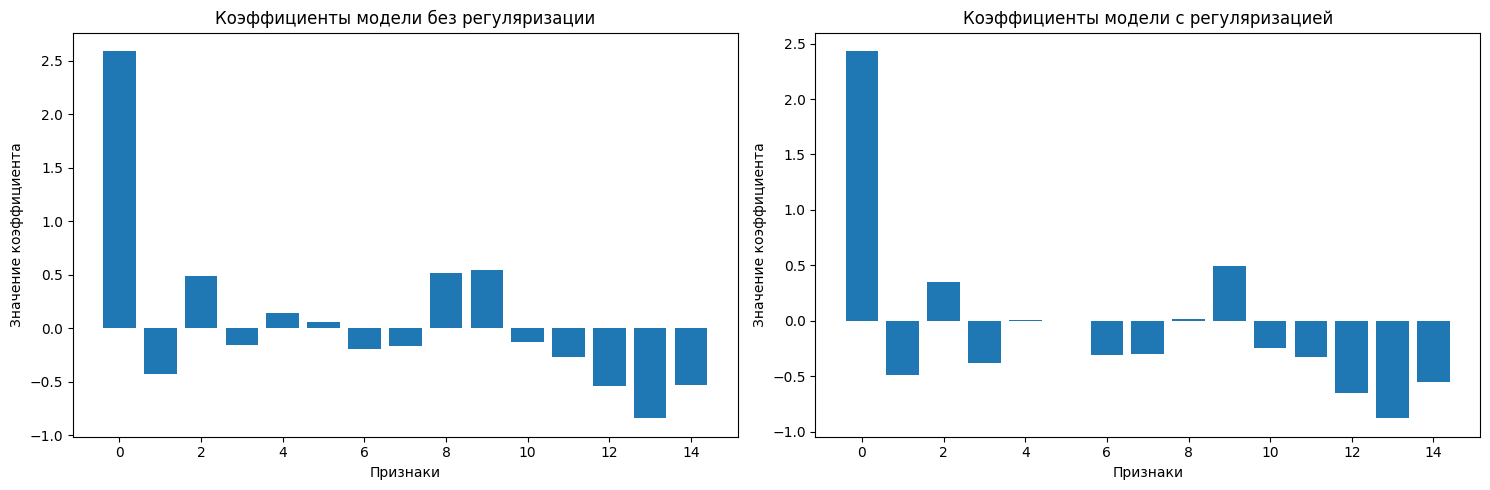

In [36]:
# Embedded - метод
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [37]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.7438
Точность на тестовой выборке: 0.6750

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.50      0.23      0.32        13

    accuracy                           0.68        40
   macro avg       0.60      0.56      0.55        40
weighted avg       0.64      0.68      0.63        40



В первых двух методах точность незначительно, но увеличилась, в третьем методе на основании логистической регрессии при регуляризации l2, вместо l1, точность незначительно сократилась. Будем использовать упаковочный или wrapper метод.

**Основные концепции**

*Прямой отбор признаков (Forward Selection)*

Процесс начинается с пустого набора признаков. На каждом шаге добавляется признак, который наиболее улучшает производительность модели. Процесс продолжается до тех пор, пока не будет достигнуто заданное количество признаков или пока добавление новых признаков не приведет к улучшению модели.

*Обратный отбор признаков (Backward Selection)*

Процесс начинается с полного набора признаков. На каждом шаге удаляется признак, который наименее влияет на производительность модели. Процесс продолжается до тех пор, пока не останется заданное количество признаков или пока удаление дополнительных признаков не ухудшит модель.

**Основные параметры SequentialFeatureSelector**

estimator: Модель (например, LinearRegression, RandomForestClassifier), которая используется для оценки важности признаков.

n_features_to_select: Количество признаков, которые необходимо отобрать. Если не указано, остается как разница между минимальным и максимальным количеством.

direction: Направление отбора признаков. Может быть 'forward' или 'backward'.

scoring: Метрика для оценки качества модели. Если не указано, используется оценка по умолчанию для данного типа задачи.

cv: Стратегия кросс-валидации. Может быть целым числом (количество фолдов) или объектом кросс-валидатора.

verbose: Уровень детализации вывода.

n_jobs: Количество параллельных процессов для выполнения вычислений.

**Преимущества**

Интуитивность: Пошаговое добавление или удаление признаков позволяет лучше понять вклад каждого признака.

Гибкость: Можно использовать различные модели и метрики для оценки важности признаков.

Автоматизация: Позволяет автоматизировать процесс отбора признаков, что особенно полезно при большом количестве признаков.
Недостатки

Временные затраты: Последовательный подход может быть вычислительно затратным, особенно при большом количестве признаков и сложных моделях.

Локальные минимумы: Метод может застрять на локальных оптимумах и пропустить комбинации признаков, которые обеспечивают лучшую производительность.

Чувствительность к коррелированным признакам: Высокая корреляция между признаками может привести к неоднозначным результатам отбора.

In [38]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [39]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)


regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


In [40]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [41]:
# K-Fold Cross-Validation без отбора признаков
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.72
Точности по каждому фолду: [0.675, 0.8, 0.65, 0.725, 0.75]


In [42]:
# K-Fold Cross-Validation после отбора признаков
# При n_splits=4 показатель средней точности наибольший
def k_fold_cross_validation(X, y, n_splits=4):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Использование на основе выборки с отобранными признаками (RFE):
k_fold_cross_validation(X = X_rfe.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.74
Точности по каждому фолду: [0.7, 0.74, 0.8, 0.72]


Точности по фолдам варьируются от 0.7 до 0.8. Это показывает, что модель ведёт себя относительно стабильно на разных подвыборках данных, хотя есть небольшие отклонения.

Средняя точность K-Fold (0.74) немного ниже средней точности до кросс-валидации (0.75) и чуть выше точности на всей выборке без отбора (0.72). Можно сделать вывод, что модель на всей выборке сталкивается с шумом данных или избыточными признаками. Отсутствие отбора признаков может мешать модели учиться эффективно, так как некоторые признаки могут быть нерелевантными.

In [43]:
# ShuffleSplit Cross-Validation до исключения выбросов
def shuffle_split_cross_validation(X, y, n_splits=4, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.68125
Точности по каждому разделению: [0.675, 0.675, 0.7125, 0.6625]


In [44]:
# ShuffleSplit Cross-Validation после исключения выбросов
def shuffle_split_cross_validation(X, y, n_splits=7, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Использование на основе выбори, очищенной от выбросов (IQR):
shuffle_split_cross_validation(X_iqr.to_numpy(), y_iqr.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.6818181818181818
Точности по каждому разделению: [0.6818181818181818, 0.7272727272727273, 0.5909090909090909, 0.7272727272727273, 0.6060606060606061, 0.696969696969697, 0.7424242424242424]


Кросс-валидация ShuffleSplit до очищения от выбросов и после не сильно отличаются по точности, даже при разном количестве n_splits. Это подтверждает идею о сбалансированности изначальной выборки.

In [45]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=10)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.7
Точность на тестовых данных: 0.6875


In [46]:
# Train-Test-Validation Split после отбора признаков
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=10)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X = X_rfe.to_numpy(), y = Y.to_numpy())

Точность на валидационных данных: 0.75
Точность на тестовых данных: 0.71875


Разница между валидационной и тестовой точностью небольшая, что указывает на то, что модель не переобучена. Показатели валидации и тестирования достаточно близки, что подтверждает стабильность модели. Однако есть подозрения на несбалансированность, так как при изменении зерна рандома сильно возрастает разница между точностью на валидационных (примерно 0,68) и тестовых данных (примерно 0,81).
Делаем общий вывод, что модель значима и ее можно использовать.

Для моего дата-сета наиболее подходящим будет метод K-Fold Cross-Validation, При использовании K-Fold каждый фолд будет представлять всю вариативность данных.

После отбора признаков выборка стала ощутимо меньше, поэтому данный метод позволяет достичь наибольшей точности результата, так как каждая часть данных используется для тестирования всего 1 раз. Точность по данному методу до отбра признаков и после отличается буквально на несколько сотых, что говорит о том, что данный метод так же хорошо справился и при изначальном наборе данных.